In [1]:
import numpy as np #support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
import pandas as pd #لمعالجة البيانات وتحليلها data manipulation and analysis.
import matplotlib.pyplot as plt # إنشاء شكل ، وإنشاء منطقة رسم في شكل
import pytesseract as Model #(OCR) tool , recognize and “read” the text embedded in images

from sklearn.model_selection import train_test_split # validator Provides train/test
import sklearn.metrics as metrics #Compute Area Under the Curve (AUC) using the trapezoidal rule.
import cv2 #loads an image from the specified file.

from keras.models import Sequential #Keras is a neural network  used to build machine learning models.
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D # building blocks of neural networks 
from keras.utils import np_utils #تحول متجه فئة (أعداد صحيحة) إلى مصفوفة فئة ثنائيه

from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

from pytesseract import Output

%matplotlib inline

In [3]:
train = pd.read_csv("archive/emnist-byclass-train.csv",delimiter = ',', header=None)
test = pd.read_csv("archive/emnist-byclass-test.csv", delimiter = ',', header=None)
mapp = pd.read_csv("archive/emnist-byclass-mapping.txt", delimiter = ' ',index_col=0, header=None, squeeze=True)
print("Train: %s, Test: %s, Map: %s" %(train.shape, test.shape, mapp.shape))
#print(mapp)

#index_col is for which col we have to fix as key in mapp.
#squeeze if true and only one column is passed, returns pandas series.
#index_col هو العمود الذي يتعين علينا إصلاحه كمفتاح في الخريطة.
#squeeze إذا كان true وتم تمرير عمود واحد فقط ، يتم إرجاع سلسلة الباندا.

Train: (697932, 785), Test: (116323, 785), Map: (62,)


In [4]:
HEIGHT = 28
WIDTH = 28
print("Height: %d" %HEIGHT ,"Width: %d" %WIDTH)

train_x = train.iloc[:,1:]#يختار العمود الاول
train_y = train.iloc[:,0]
#df.iloc [:، 0: 2] يختار الأعمدة حتى (باستثناء) العمود الثاني
#df.iloc [:، 2] يختار العمود الثاني
test_x = test.iloc[:,1:]
test_y = test.iloc[:,0]
#shape إيجاد أبعاد المصفوفة. تقوم بإرجاع الشكل
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

Height: 28 Width: 28
(697932, 784) (697932,) (116323, 784) (116323,)


Text(0.5, 1.0, 'Distribution of dataset')

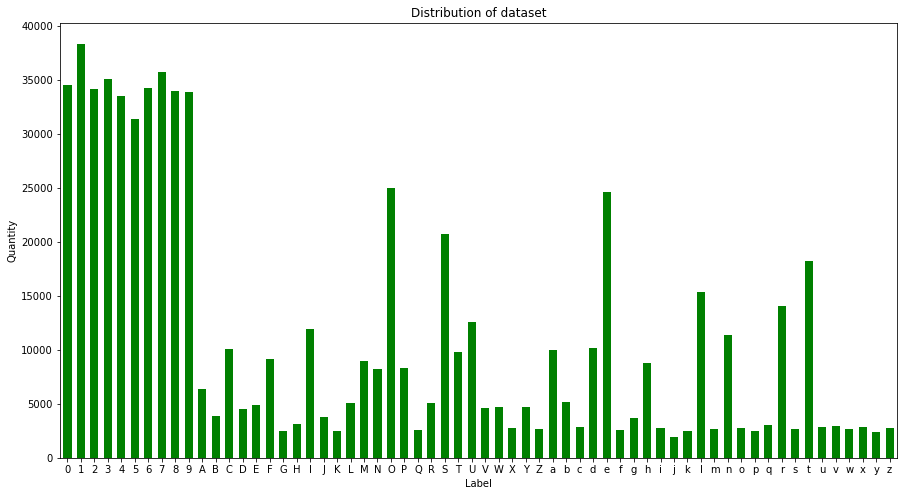

In [5]:
unique, counts = np.unique(train_y, return_counts=True)
s1=pd.Series(counts)   # import panda as pd 
plt.rcParams['figure.figsize']=(15,8) # import matplotlib.pyplot as plt 
s1.plot.bar(color='g' , width=0.6 ,rot=0) # design
x = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'] # data 
xi = list(range(len(x)))
#plt.bar(unique, counts, marker='o', linestyle='--' , color='g' , width=0.6)
plt.xticks(xi,x)#  لإزالة علامات التجزئة عند المحور السيني remove of ticks labels at the x-axis 
#the stile Color Label Printers
# التنبؤ إلى حد بعيد  Prediction by far
#تفسير بسيط حول البيانات عدد المرات التي تحدث فيها قيمة البيانات
plt.xlabel("Label") 
plt.ylabel("Quantity") 
plt.title("Distribution of dataset") #  تفسير بسيط حول البيانات عدد المرات التي تحدث فيها قيمة البيانات

In [6]:
#تبدأ مجموعات الوظائف بالكلمة الأساسية def متبوعة باسم الوظيفة والأقواس
def flip_and_rotate(image):
    image = image.reshape([HEIGHT, WIDTH])#إعادة تشكيل على طول أبعاد مختلفة.
    image = np.fliplr(image)   #لعكس ترتيب عناصر المصفوفة
    image = np.rot90(image)   #ثلاث معاملات وتقوم بإرجاع النسخة التي تم تدويرها
    return image
# Flip and rotate dataset image
# axis=1 means along X axis

In [7]:
train_x = np.asarray(train_x) #عند الحاجة إلى تحويل مُدخل إلى مصفوفة.
train_x = np.apply_along_axis(flip_and_rotate, 1, train_x) #لتطبيق وظيفة على الشرائح 1-D على طول المحور المحدد
print ("train_x:",train_x.shape)
train_x = train_x.astype('float32')
train_x /= 255.0

train_x: (697932, 28, 28)


In [8]:
test_x = np.asarray(test_x)
test_x = np.apply_along_axis(flip_and_rotate, 1, test_x)
print ("test_x:",test_x.shape)
test_x = test_x.astype('float32')
test_x /= 255.0

test_x: (116323, 28, 28)


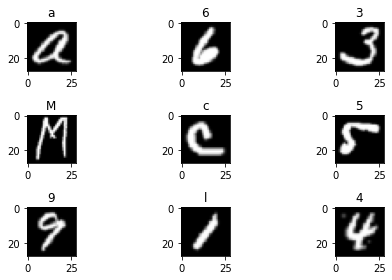

In [9]:
# plot image
plt.rcParams['figure.figsize']=(7,4) #يمكننا استخدامه للتحكم في الإعدادات الافتراضية عرض الخط واللون والنمط 
for i in range(1,10):
    plt.subplot(3,3,i) #(subplot)لإنشاء شكل ومجموعة من الحبكات الفرعية.
    plt.imshow(train_x[i], cmap=plt.get_cmap('gray')) #لتعيين خريطة الألوان على "الرمادي
    plt.title(chr(mapp[train_y[i]]))
plt.tight_layout()

In [10]:
num_classes = train_y.nunique() #عدد القيم الفريدة لكل عمود
print("number of classes:- "+str(num_classes))

number of classes:- 62


In [11]:
# One hot encoding
train_y = np_utils.to_categorical(train_y, num_classes) #تحويل متجه الفئة (أعداد صحيحة من 0 إلى nb_classes) إلى مصفوفة فئة ثنائية
test_y = np_utils.to_categorical(test_y, num_classes)
print("train_y: ", train_y.shape)
print("test_y: ", test_y.shape)

train_y:  (697932, 62)
test_y:  (116323, 62)


In [12]:
# Reshape image  إعادة تشكيل الصورة لـ 
train_x = train_x.reshape(-1, HEIGHT, WIDTH, 1) #تستخدم TensorFlow backend
test_x = test_x.reshape(-1, HEIGHT, WIDTH, 1)     # defolt (..,h,w,1)
print("train_y: ", train_x.shape)
print("test_y: ", test_x.shape)

#-1 for unknown dimension لبعد غير معروف

train_y:  (697932, 28, 28, 1)
test_y:  (116323, 28, 28, 1)


In [13]:
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size= 0.3, random_state=1)

In [14]:
# Building model

model = Sequential()
#padding= 'same' / 'valid'
model.add(Conv2D(filters=128, kernel_size=(3,3), padding = 'same', activation='relu',input_shape=(HEIGHT, WIDTH,1)))
model.add(MaxPooling2D(pool_size=(3,3), strides=3))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=3))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 128)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               73856     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#لحساب الخسارة التبادلية بين التسميات والتنبؤات
#التحسين في التعليمات
history = model.fit(train_x, train_y, epochs=5, batch_size=128, verbose=1, validation_data=(val_x, val_y)) #يمكن استخدامه للتحقق مما إذا كان نوع بيانات الإدخال صحيحًا أم لا.
#Verbose=0 (silent)
#Verbose=1 (progress bar)
#Verbose=2 (one line per epoch)


Epoch 1/5
3817/3817 [==============================] - 581s 152ms/step - loss: 0.8938 - accuracy: 0.7286 - val_loss: 0.4719 - val_accuracy: 0.8346
Epoch 2/5
3817/3817 [==============================] - 565s 148ms/step - loss: 0.5991 - accuracy: 0.8017 - val_loss: 0.4273 - val_accuracy: 0.8479
Epoch 3/5
3817/3817 [==============================] - 562s 147ms/step - loss: 0.5498 - accuracy: 0.8158 - val_loss: 0.4158 - val_accuracy: 0.8514
Epoch 4/5
3817/3817 [==============================] - 562s 147ms/step - loss: 0.5233 - accuracy: 0.8230 - val_loss: 0.4062 - val_accuracy: 0.8546
Epoch 5/5
3817/3817 [==============================] - 559s 146ms/step - loss: 0.5082 - accuracy: 0.8274 - val_loss: 0.4013 - val_accuracy: 0.8563


In [16]:
# plot accuracy and loss
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper left') #أبسط وسيلة إيضاح
    plt.show()

# plot accuracy and loss
def plotgraph1(epochs, loss, val_loss):
    # Plot training & validation accuracy values
    plt.plot(epochs, loss, 'b')
    plt.plot(epochs, val_loss, 'r')
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper left')
    plt.show()

In [17]:
#%%
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1) #تحدد عدد المرات التي ستعمل فيها خوارزمية التعلم من خلال مجموعة بيانات التدريب بأكمله

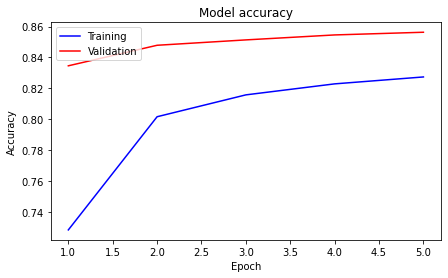

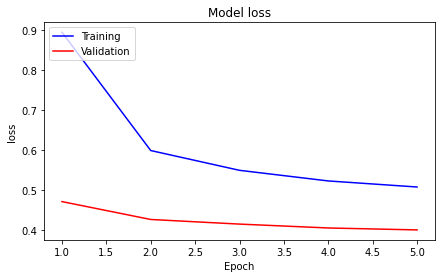

In [18]:
# Accuracy curve
plotgraph(epochs, acc, val_acc)

# loss curve
plotgraph1(epochs, loss, val_loss)

In [19]:
score = model.evaluate(test_x, test_y, verbose=1) #التقييم هو عملية أثناء تطوير النموذج للتحقق مما إذا كان النموذج هو الأنسب للمشكلة المعينة والبيانات المقابلة. يوفر نموذج Keras وظيفة
print("Test loss:", score[0])
print("Test accuracy:", score[1])

3636/3636 [==============================] - 38s 10ms/step - loss: 0.3992 - accuracy: 0.8554
Test loss: 0.3991658389568329
Test accuracy: 0.8554198145866394


In [20]:
y_pred = model.predict(test_x)
y_pred = (y_pred > 0.5) #قارن الآن قيم المخرجات الفعلي
print(y_pred)
print(y_pred.shape)

[[False  True False ... False False False]
 [False False False ... False False False]
 [ True False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
(116323, 62)


In [21]:
cm = metrics.confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1)) #To create a confusion matrix for a logistic regression model  #return the indices of the elements 
print(cm)
print(cm.shape)
sum=0
for i in range(62) : 
    for j in range(62) : 
        sum += cm[i][j] 
    print("total sample of",chr(mapp[i]),"=",sum,"& Accuracy of detection of",chr(mapp[i]),"=",cm[i][i]/sum) #3
    sum = 0

[[4968    1    0 ...    0    0    0]
 [ 649 5593   10 ...    0    0    0]
 [  94    1 5700 ...    0    0   13]
 ...
 [  34    0    1 ...  334    0    0]
 [  82    0    0 ...    0    7    0]
 [ 117    0  103 ...    0    0  156]]
(62, 62)
total sample of 0 = 5778 & Accuracy of detection of 0 = 0.8598130841121495
total sample of 1 = 6330 & Accuracy of detection of 1 = 0.8835703001579779
total sample of 2 = 5869 & Accuracy of detection of 2 = 0.9712046345203612
total sample of 3 = 5969 & Accuracy of detection of 3 = 0.9855922265036019
total sample of 4 = 5619 & Accuracy of detection of 4 = 0.9597793201637302
total sample of 5 = 5190 & Accuracy of detection of 5 = 0.892485549132948
total sample of 6 = 5705 & Accuracy of detection of 6 = 0.9810692375109553
total sample of 7 = 6139 & Accuracy of detection of 7 = 0.992018244013683
total sample of 8 = 5633 & Accuracy of detection of 8 = 0.9772767619385763
total sample of 9 = 5686 & Accuracy of detection of 9 = 0.9766092156173056
total sample of

text written in image is:
D


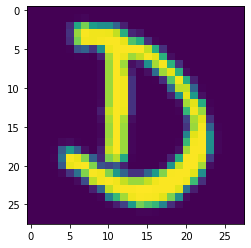

In [38]:
'''single letter prediction'''
img = load_img('D.jpeg', grayscale=True,   #تحويل صورتنا الأصلية من مساحة ألوان BGR إلى اللون الرمادي
               target_size=(28, 28))

plt.imshow(img)

img = img_to_array(img)
img = img.reshape(1, 28, 28, 1)
img = img.astype('float32') #تحويل كائن الباندا إلى نوع بيانات محدد
img = img / 255.0

#model = load_model('final_model.h5')
digit = np.argmax(model.predict(img), axis=-1)
print("text written in image is:")
print(chr(mapp[digit[0]]))

In [24]:

from keras.models import load_model
from keras.models import model_from_json

model_json = model.to_json()
with open("./model.json", "w") as json_file:
    json_file.write(model_json)
#saves the model info as json file
    
model.save_weights("./model.h5")
# Creates a HDF5 file 'model.h5'


In [25]:

from keras.models import load_model
from keras.models import model_from_json

json_file = open('./model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights('./model.h5')

model = loaded_model

print('Model successfully loaded')


Model successfully loaded


threshold value 127.0


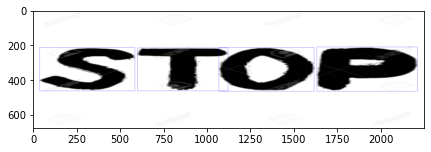

In [39]:
characters = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

image = cv2.imread("images.png")
height, width, depth = image.shape

#resizing the image to find spaces better
image = cv2.resize(image, dsize=(width*10,height*3))

#grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

#binary
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
print('threshold value',ret)

#dilation/Thinning
kernel = np.ones((5,5), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=2)

#adding GaussianBlur
gsblur=cv2.GaussianBlur(img_dilation,(3,3),0)

#find contours
ctrs, hier = cv2.findContours(gsblur.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

margin=0

sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.minAreaRect(ctr)[0])

pchl = list()
dp = image.copy()
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    cv2.rectangle(dp,(x-margin,y-margin),( x + w + margin, y + h + margin ),(0,0,255),1)
    
plt.imshow(dp)

All possible character in image 0 are:  S
All possible character in image 1 are:  T
All possible character in image 2 are:  0/O/o
All possible character in image 3 are:  P/p


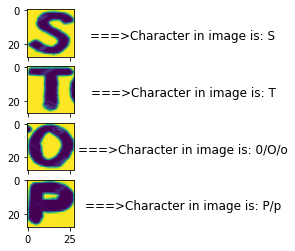

Predicted String: ST0P


In [40]:
m = list()
ls=list()
for i, ctr in enumerate(sorted_ctrs):
    print('All possible character in image '+str(i)+' are: ',end=' ')
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    # Getting ROI
    roi = image[y-10:y+h+10, x-10:x+w+10]
    roi = cv2.resize(roi, dsize=(28,28), interpolation=cv2.INTER_AREA)
    #inter_cubic -> for increasing
    #inter_area  -> for shrinking
    roi = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
    
    roi = np.array(roi)
    t = np.copy(roi)
    t = t / 255.0
    t = 1-t
    t = t.reshape(1,28,28,1)
    m.append(roi)
    pred = np.argmax(model.predict(t), axis=-1)
    pchl.append(pred)
    l = model.predict(t)
    o=np.argwhere(l>0.1)
    ans=""
    for c in range(len(o)):
        ans=ans+characters[o[c][1]]
        print(characters[o[c][1]],end="")
        if(c!=len(o)-1):
            ans=ans+'/'
            print('/',end="")
    ls.append(ans)
    print()
    
pcw = list()
interp = 'bilinear'
fig, axs = plt.subplots(nrows=len(sorted_ctrs), sharex=True, figsize=(1,len(sorted_ctrs)))
for i in range(len(pchl)):
    ans=""
    for c in range(len(o)):
        ans=ans+characters[o[c][1]]
        if(c!=len(o)-1):
            ans=ans+'/'

    pcw.append(characters[pchl[i][0]])
    axs[i].set_title('===>Character in image is: '+ls[i],x=3.3,y=0.24)
#    axs[i].set_title('-------> predicted letter: '+characters[pchl[i][0]], x=2.5,y=0.24)
    axs[i].imshow(m[i], interpolation=interp)

plt.show()

predstring = ''.join(pcw)
print('Predicted String: '+predstring)